In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pickleFile = open("data.pkl","rb")
obj = pd.read_pickle(pickleFile)
#obj

In [4]:
x1_train = obj["train"]["x1"]
x2_train = obj["train"]["x2"]
y_train = obj["train"]["y"]

x1_test = obj["test"]["x1"]
x2_test = obj["test"]["x2"]
y_test = obj["test"]["ytest"]

x1lab = "living area"
x2lab = "year built"
ylab = "selling price"

In [5]:
train_data = {x1lab: x1_train, x2lab: x2_train, ylab: y_train}
print(pd.DataFrame(train_data))

     living area  year built  selling price
0           1792        2001         231500
1           2192        1939         179500
2            900        1967         122000
3            630        1970          84500
4           1188        1959         142000
..           ...         ...            ...
495          804        1940         119000
496         1734        1962         159000
497          882        1959         106500
498         1339        1990         180000
499         1498        2006         204900

[500 rows x 3 columns]


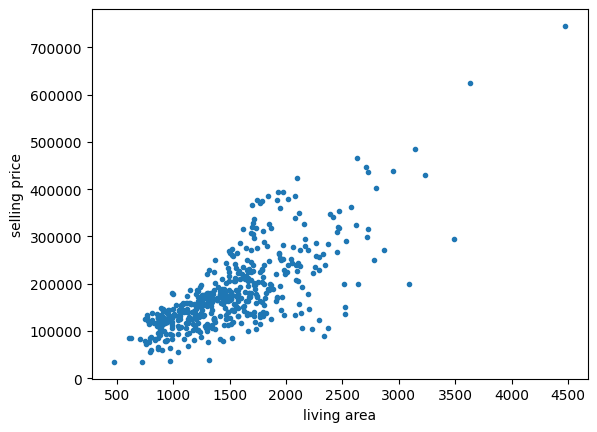

In [6]:
#living area vs selling price (training data)

plt.scatter(x1_train, y_train, marker='.')
plt.xlabel(x1lab)
plt.ylabel(ylab)
plt.show()

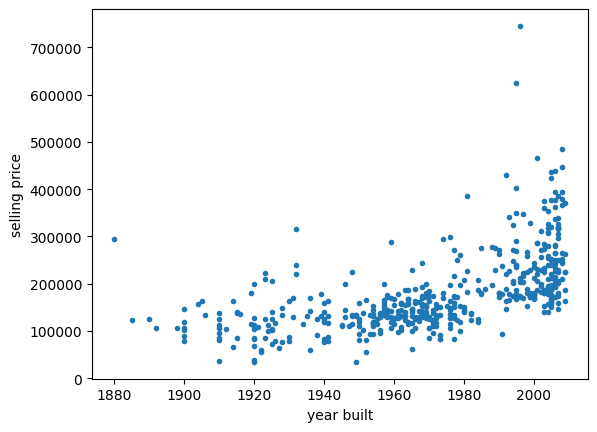

In [7]:
#year built vs selling price (training data)

plt.scatter(x2_train, y_train, marker='.')
plt.xlabel(x2lab)
plt.ylabel(ylab)
plt.show()

## Regression Funtions

In [8]:
#performing gradient descent
def gradientDescent(X, y, w, lr, num_iter):
  n = len(y)
  for i in range(num_iter):
    errors = np.matmul(X, w) - y
    w -= (lr / n) * np.matmul(X.transpose(), errors)
  return w


#mean normalization
def normalize(x):
  mu = x.mean(0)
  sigma = x.std(0)
  xn = (x - mu) / sigma
  return xn


#visualization
def plotUnivariateRegression(x_test, x, y_pred, xlab):
  plt.scatter(x_test, y_test, color='red', marker='.', alpha=0.5, label='Test Data (Ground Truth)')
  plt.plot(x, y_pred, color='blue', label="Univariate Linear Regression (Model Output)")
  plt.title("Univariate Linear Regression")
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.legend()
  plt.show()


def plotMultivariateRegression(x_test, x, y_pred):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x_test[:, 0], x_test[:, 1], y_test, color='red', marker='.', alpha=0.5, label='Test Data (Ground Truth)')
  ax.scatter(x[:, 0], x[:, 1], y_pred, color='blue', marker='.', alpha=0.5, label='Predictions (Model Output)')
  ax.set_title('Multiple Linear Regression')
  ax.set_xlabel(x1lab)
  ax.set_ylabel(x2lab)
  ax.set_zlabel(ylab)
  ax.legend()
  plt.show()


def regressionFit(x, y, x_test, lr, num_iter, xlab):
  n = len(y)

  xn = normalize(x)
  X = np.column_stack((np.ones(n), xn))
  w = np.zeros(X.shape[1])
  w = gradientDescent(X, y, w, lr, num_iter)
  y_pred = np.matmul(X, w)

  #plotting the results

  if 'NA' in xlab:
    plotMultivariateRegression(x_test, x, y_pred)
  else:
    plotUnivariateRegression(x_test, x, y_pred, xlab)

  pred_error = np.sqrt((1/n)*(np.sum((np.subtract(y_pred, y_test))**2)))
  print("\nCoefficients:", w)
  return pred_error



lr = 0.003
num_iter = 1000


## Linear Regression

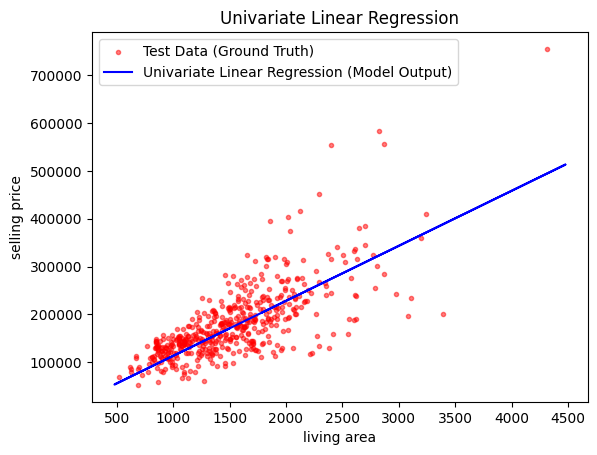


Coefficients: [170904.89191726  58793.49408596]

Test error is 97173.37012738081


In [9]:
#fitting Linear Regression for x1
error = regressionFit(x1_train, y_train, x1_test, lr, num_iter, x1lab)
print("\nTest error is", error)

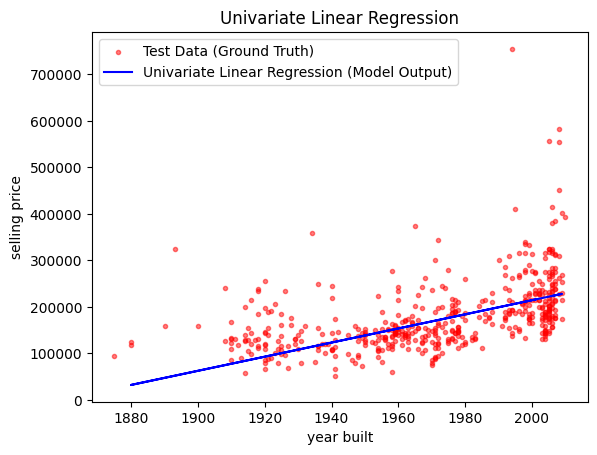


Coefficients: [170904.89191726  45642.08711178]

Test error is 86336.81295830577


In [10]:
#fitting Linear Regression for x2
error = regressionFit(x2_train, y_train, x2_test, lr, num_iter, x2lab)
print("\nTest error is", error)

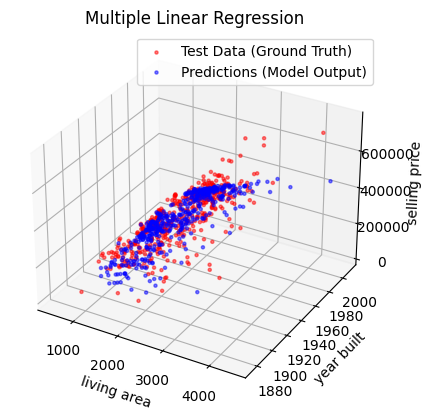


Coefficients: [170904.89191726  51551.86189212  35293.05863877]

Test error is 101556.90220314963


In [12]:
#fitting Linear Regression for (x1, x2)

x_train = np.column_stack((x1_train, x2_train))
x_test = np.column_stack((x1_test, x2_test))

error = regressionFit(x_train, y_train, x_test, lr, num_iter, 'NA')
print("\nTest error is", error)